# 0.0 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# 1.0 Conhecendo os Dados

## 1.1 Primeiras Linhas

In [3]:
df_raw = pd.read_csv(r"C:/users/leovi/CursoDS/Pratica/datasets/marketing_campaign.csv", sep=None)

In [4]:
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dimensões

In [5]:
print("Número de Linhas:", df_raw.shape[0])
print("Número de Colunas:", df_raw.shape[1])

Número de Linhas: 2240
Número de Colunas: 29


## 1.2 Integridade dos Dados

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Existem 24 valores nulos na coluna "Income". Para lidar com estes valores optei por preenchê-los com a média.

In [7]:
df_raw.Income = df_raw.Income.fillna(df_raw.Income.mean())

A variável Dt_customer que indica desde quando o ciente é cliente, está com seu tipo como object, irei transformar para datetime.

In [8]:
df_raw["Dt_Customer"] = pd.to_datetime(df_raw["Dt_Customer"])

## 1.3 Estatísticas Descritivas

### Variáveis Numéricas

In [9]:
df_raw.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25037.80,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51741.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


### Variáveis Categóricas

In [10]:
categorias = ["Education", "Marital_Status", "Complain"]

for i in categorias:
    print(i, ":\n")
    print(df_raw[i].value_counts())
    print("\n\n")

Education :

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64



Marital_Status :

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



Complain :

0    2219
1      21
Name: Complain, dtype: int64





## 1.4 Engenharia de Variáveis

A fim a deixarmos a análise mais consistente, iremos criar algumas variáveis baseadas nas que já temos, além de corrigir alguns erros de entrada.

In [11]:
# Criando uma cópia para trabalharmos em cima
df = df_raw.copy()

In [12]:
# Removendo um outlier extremo visto em Income
df.drop(df[df["Income"]==666666.00].index, axis = 0, inplace = True)


# Total gasto pelo cliente
df["total_gasto"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + \
df["MntSweetProducts"] + df["MntGoldProds"]


# Idade
df["idade"] = 2015 - df["Year_Birth"]


# Número total de compras
df["total_compras"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]


# Existem clientes que nunca compraram nada, iremos remove-los
df.drop(df[df["total_compras"]==0].index, axis = 0, inplace = True)


# Tempo como cliente em meses
data_atual = pd.to_datetime(datetime.strptime('2015-01-01', '%Y-%m-%d').date())
df["meses_como_cliente"] = round((data_atual - df.Dt_Customer)/np.timedelta64(1, 'M'))


# Gasto médio por compra
df["gasto_medio"] = df["total_gasto"] / df["total_compras"]


# Total Filhos e filhos
df["total_filhos"] = df["Kidhome"] + df["Teenhome"]
df["filhos"] = np.where(df["total_filhos"] > 0, "sim", "nao")


# Corrigindo valores sem sentido em "Marital_Status"
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"in_couple", "Together":"in_couple", "Single":"single", 
                                                     "Divorced":"single", "Widow":"single", "Alone":"single", 
                                                     "Absurd":"single", "YOLO":"single"})


# Reduzindo as categorias de "Education" para apenas duas categorias (undergraduated, graduated)
df["Education"] = df["Education"].replace({"Graduation":"graduated", "PhD": "postgraduated", "Master": "postgraduated", "2n Cycle":"undergraduated", "Basic":"undergraduated"})



# Removendo colunas que não acrescentam mais informação ou que não iremos utilizar para esta análise
df.drop(["Year_Birth", "Kidhome", "Teenhome", "Dt_Customer", "Z_CostContact", "Z_Revenue", 
         'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'], axis = 1, inplace=True)

# 2.0 Análise Exploratória

Aqui iremos estudar um pouco nossos clientes e seus comportamentos.

## 2.1 Informações Pessoais

In [13]:
inf_pessoais = ["Education", "Marital_Status", "Income", "total_filhos"]

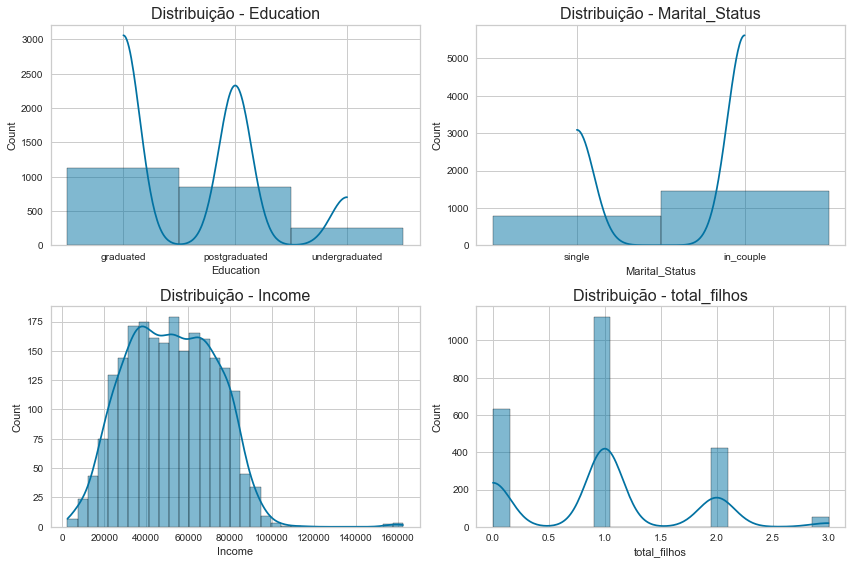

In [14]:
plt.figure(figsize=[12, 8])
for i in inf_pessoais:
    plt.subplot(2, 2, inf_pessoais.index(i) + 1)
    sns.histplot(df[i], kde = True)
    plt.title("Distribuição - " + str(i), fontsize=16)
    plt.tight_layout()
    
plt.show()

1. Apenas 11% dos nossos clientes não são graduados.
2. 64% dos clientes possuem um parceiro.
3. 70% dos clientes possuem pelo menos 1 filho.
4. A média salarial de nossos clientes é de 52k dólares por ano.(Podemos perceber alguns outliers extremos, mais tarde lidares com este problema)

## 2.2 Relacionamento com a Empresa

In [15]:
inf_relacionamento = ["meses_como_cliente", "Recency", "Complain", "total_gasto", "total_compras", "gasto_medio"]

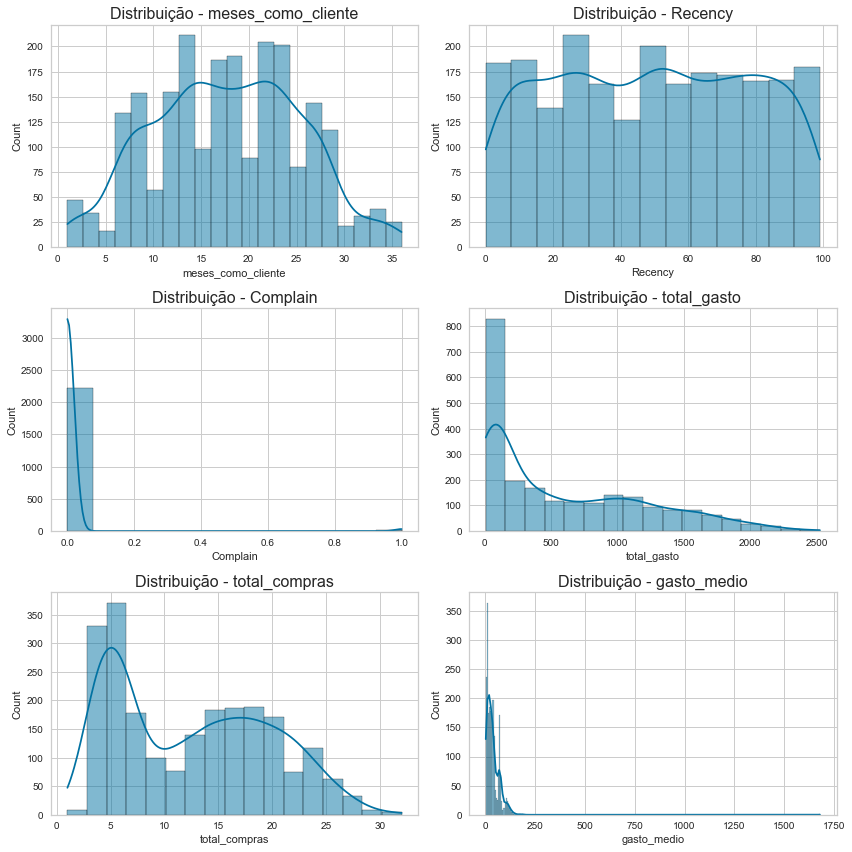

In [16]:
plt.figure(figsize=[12, 12])
for i in inf_relacionamento:
    plt.subplot(3, 2, inf_relacionamento.index(i) + 1)
    sns.histplot(df[i], kde = True)
    plt.title("Distribuição - " + str(i), fontsize=16)
    plt.tight_layout()
    
plt.show()

1. O tempo médio de nossos clientes como clientes é de 18 meses com um desvio de 8.
2. A ultima compra de nossos clientes esta uniformemente distibuida entre 0 e 100 dias, isso significa que a probabilidade de um cliente ter comprado pela ultima vez a 1 dia, ou a 50 dias, ou a 100 dias é semelhante.
3. De todos os 2240 cadastrados em nossa base, apenas 21 deles realizaram algum tipo de reclamação formal.
4. Cerca de 50% de dos nossos clientes gastaram até 400 dólares apenas em seu tempo de vida atual.
5. Em média nossos clientes realizaram um total de 12 compras conosco em seu tempo de vida atual, além disso podemos ver um pico de clientes que realizaram apenas 5 compras.
6. O gasto médio por compra é de 30 dólares.

## 2.3 Hábitos de Consumo

In [17]:
inf_habitos = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

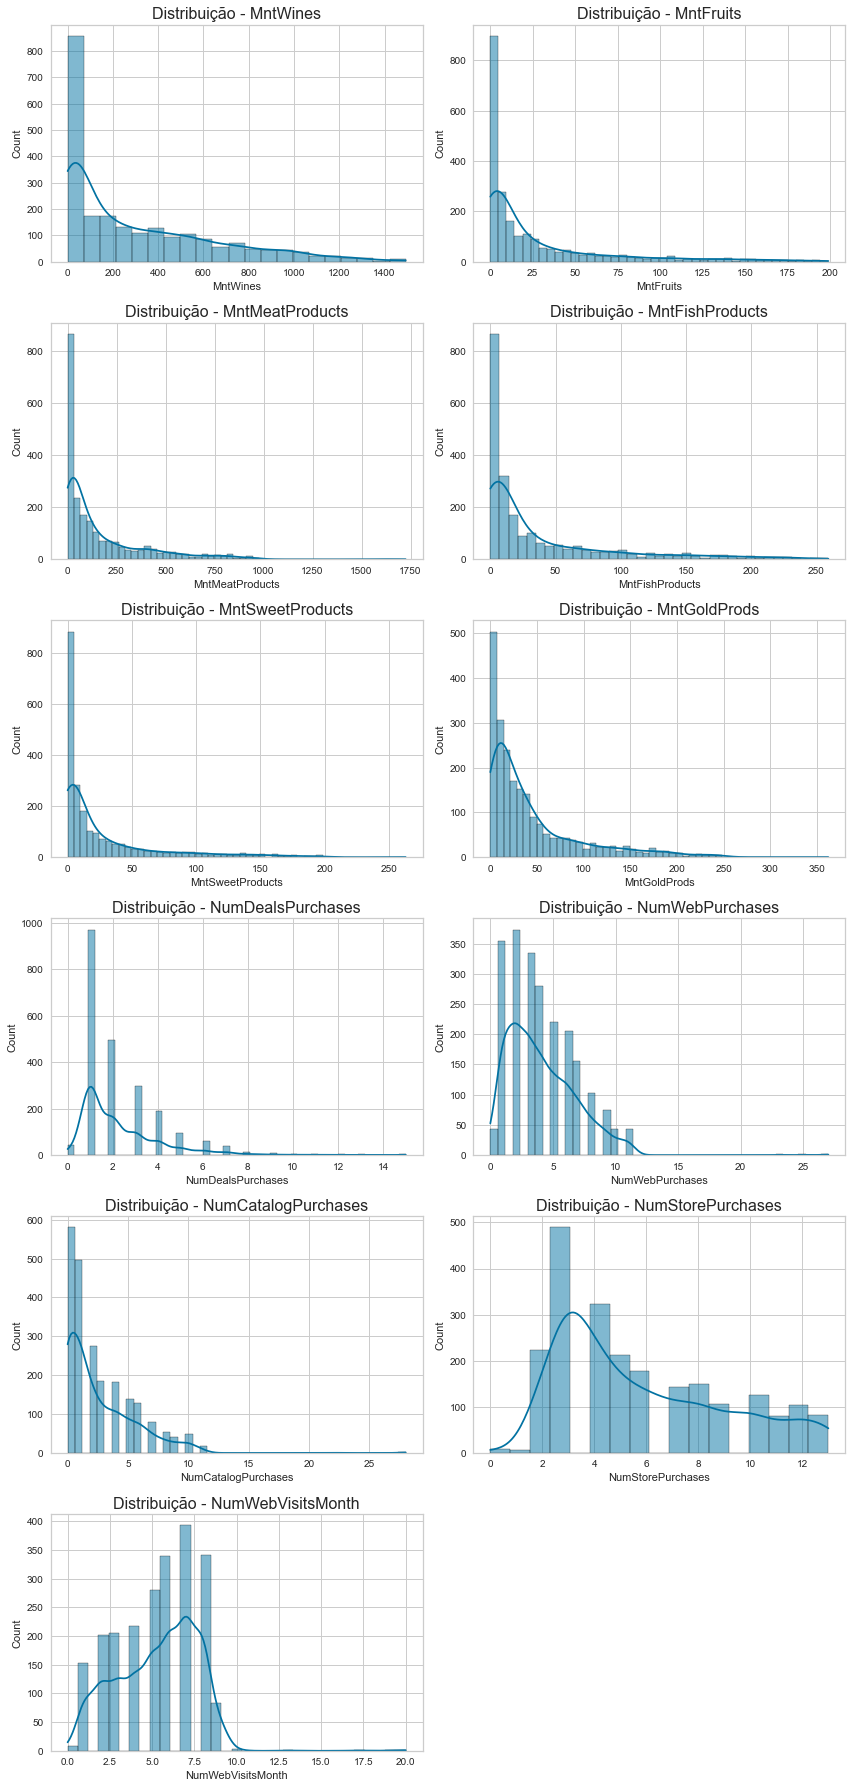

In [18]:
plt.figure(figsize=[12, 25])
for i in inf_habitos:
    plt.subplot(6, 2, inf_habitos.index(i) + 1)
    sns.histplot(df[i], kde = True)
    plt.title("Distribuição - " + str(i), fontsize=16)
    plt.tight_layout()
    
plt.show()

1. Os clientes compram em média mais pela loja fisica, depois pela internet e pouquissimas vezes compram pelo catálogo.
2. Nossos clientes realizaram poucas compras por promoções, apesar de termos alguns outliers com mais de 10 compras por promoção.
3. Dentre os produtos oferecidos, o que mais gera receita são os vinhos.
4. Tivemos em média 5 acessos ao site por cliente no mês passado.

# 3.0 Segmentação

Para esta segunda iteração do nosso problema de segmentação de clientes, iremos segmentá-los a partir de seus hábitos de consumo. 

Para isto iremos primeiro visualizar nossos dados, para verificar se há realmente alguns agrupamentos naturais sob o hábitos de consumo. Como os dados estão em alta dimensionalidade, iremos utilizar um modelo de redução de dimensionalidade muito util para visualizações, o t-sne.

Após visualizarmos os dados, iremos utilizar o modelo k-means para clusterizar os clientes em diferentes grupos por hábitos de consumo.

## 3.1 Selecionando as Features

Como nosso objetivo é clusterizar nossos clientes com base em seus hábitos de consumo, nós só iremos utilizar as colunas referentes as estes hábitos, não iremos utilizar informações pessoais ou de relacionamento.

In [19]:
# Criando outra cópia
df2 = df.copy()

In [20]:
df2 = df2[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]

## 3.2 Pré-Processamento

Outro passo necessário é colocar os valores em uma escala percentual antes de modelar, pois nós queremos que todos os itens tenham a mesma importância, alguns itens são mais caros que outros e isso pode distorcer um pouco a noção de hábito de consumo.

Ao colocar as variáveis em percentual, nós já estamos rescalando as mesmas, desta forma não é necessário nenhum outro pre processamento.

In [21]:
consumo = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
local = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

for i in consumo:
    df2[i] = df2[i] / df["total_gasto"]
    
for i in local:
    df2[i] = df2[i] / df["total_compras"]

In [22]:
# for i in df2.columns.tolist():
#     mm_scaler = MinMaxScaler()
#     df2[i] = mm_scaler.fit_transform(df2[i].values.reshape(-1, 1))

## 3.3 Visualização com T-SNE

In [23]:
X = df2.values

In [24]:
tsne = TSNE(perplexity = 35, n_iter = 2500, learning_rate=300)

In [25]:
X_reduce = tsne.fit_transform(X)

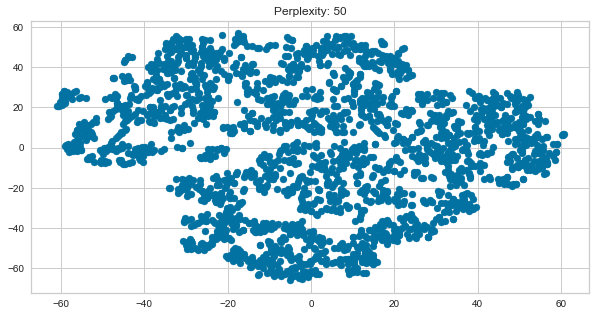

In [26]:
plt.figure(figsize=[10, 5])
    
plt.title("Perplexity: 50")
plt.scatter(X_reduce[:, 0], X_reduce[:, 1])

Podemos identificar que existem cerca de 3 ou mais grupos naturais. Desta forma podemos ficar mais confiantes para realizar a clusterização, voltaremos a este gráfico após a modelagem para ver como ficaram os agrupamentos.

## 3.4 Clusterização com k-means

### N° de clusters com o Gráfico de Elbow

Para definirmos o número de clusters ideal, vamos analisar o gráfico de elbow.

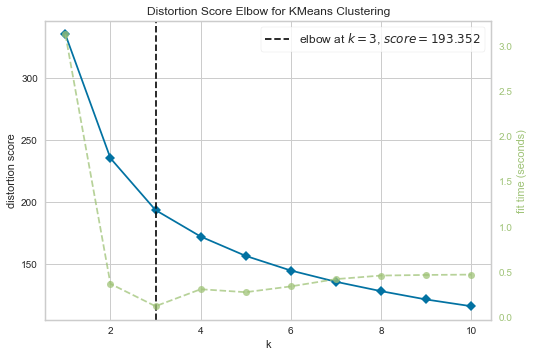

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X)
visualizer.show()

3 parece o número ideal de clusters.

### Modelagem

In [28]:
# Treinando o modelo

kmeans = KMeans(n_clusters=3).fit(X)

In [29]:
# Prevendo os clusters

labels = kmeans.predict(X)

## 3.5 Analisando os Clusters

### Gráfico TSNE

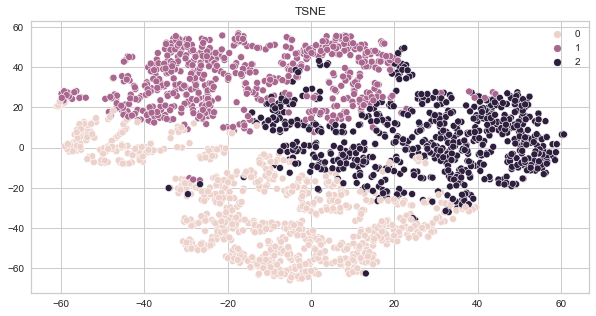

In [30]:
plt.figure(figsize=[10, 5])
    
plt.title("TSNE")
sns.scatterplot(X_reduce[:, 0], X_reduce[:, 1], hue = labels);

Aqui podemos ter breve noção da distribuição dos clusters.

In [31]:
#Fazendo uma cópia para trabalharmos

df3 = df.copy()
df3 = df3[['ID', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]

In [32]:
# Criando a coluna com os respectivos clusters de cada cliente

df3["cluster"] = labels

### Distribuição dos Clusters

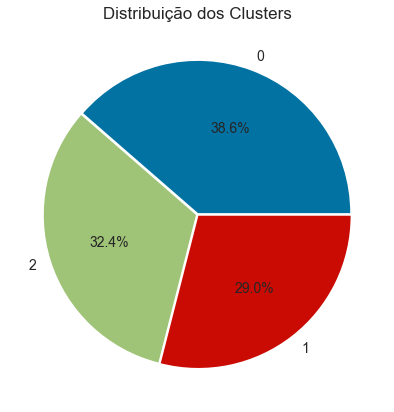

In [33]:
plt.figure(figsize=[12, 7])
plt.pie(df3.cluster.value_counts().values, labels=df3.cluster.value_counts().index, explode = [0.01, 0.01, 0.01], \
        autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Distribuição dos Clusters", fontsize = 17);

### Análise Descritiva

#### Eng. Variáveis

In [34]:
#Total Gasto
df3["total_spend"] = df3["MntWines"] + df3["MntFruits"] + df3["MntMeatProducts"] + df3["MntFishProducts"] + \
                     df3["MntSweetProducts"] + df3["MntGoldProds"]

# Total Compras
df3["total_compras"] = df3["NumWebPurchases"] + df3["NumCatalogPurchases"] + df3["NumStorePurchases"]

#### Média de Compras

In [35]:
df3.groupby("cluster").mean().T.round().iloc[1:, :]

cluster,0,1,2
MntWines,402.0,37.0,429.0
MntFruits,13.0,15.0,52.0
MntMeatProducts,92.0,42.0,370.0
MntFishProducts,19.0,20.0,76.0
MntSweetProducts,14.0,14.0,55.0
MntGoldProds,37.0,27.0,68.0
NumWebPurchases,5.0,2.0,5.0
NumCatalogPurchases,2.0,1.0,5.0
NumStorePurchases,6.0,4.0,7.0
total_spend,577.0,153.0,1050.0


#### Pencentual Relativo de Compras

In [36]:
# Por produtos comprados

df_pct_prod = ((df3.groupby("cluster").mean().T.iloc[1:7, :] / df3.groupby("cluster").mean().T.iloc[10, :] ) * 100).round(1)
df_pct_prod

cluster,0,1,2
MntWines,69.7,23.9,40.8
MntFruits,2.3,9.6,5.0
MntMeatProducts,15.9,27.1,35.2
MntFishProducts,3.3,13.0,7.2
MntSweetProducts,2.4,9.2,5.2
MntGoldProds,6.4,17.3,6.5


In [37]:
# Por local de compra

df_pct_local = ((df3.groupby("cluster").mean().T.iloc[7:10, :] / df3.groupby("cluster").mean().T.iloc[-1, :] ) * 100).round(1)
df_pct_local

cluster,0,1,2
NumWebPurchases,36.0,35.6,28.3
NumCatalogPurchases,16.6,8.4,30.1
NumStorePurchases,47.3,56.0,41.6


## 3.6 Descrição de Cada Agrupamento

### Cluster 0

- Clientes com uma frequencia mediana que compram muito vinho, mas muito pouco de qualquer outra mercadoria. Compram mais pela internet que os outros grupos.

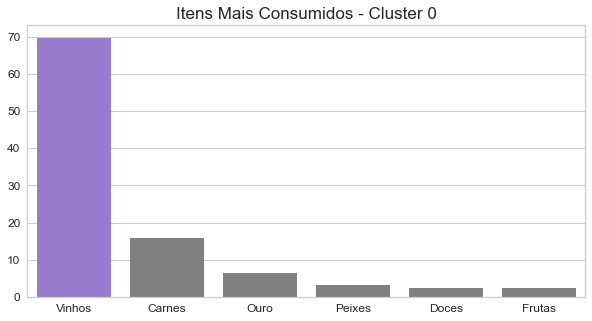

In [76]:
plt.figure(figsize=[10, 5])

col_cluster0 = df_pct_prod.iloc[:, 0].sort_values(ascending=False)

sns.barplot(x = ["Vinhos", "Carnes", "Ouro", "Peixes", "Doces", "Frutas"], y=col_cluster0.values, palette=["MediumPurple", \
                 "grey", "grey", "grey", "grey", "grey"])
plt.title("Itens Mais Consumidos - Cluster 0", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Cluster 1

- Clientes que menos compraram, suas compras são mais diversificadas que os outros grupos. Compram mais na loja que os outros grupos.

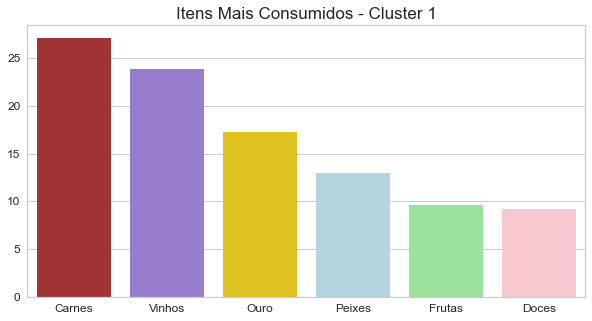

In [96]:
plt.figure(figsize=[10, 5])

col_cluster1 = df_pct_prod.iloc[:, 1].sort_values(ascending=False)

sns.barplot(x = ["Carnes", "Vinhos", "Ouro", "Peixes", "Frutas", "Doces"], y=col_cluster1.values, palette=["FireBrick", \
                 "MediumPurple", "gold", "lightblue", "lightgreen", "pink"])
plt.title("Itens Mais Consumidos - Cluster 1", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Cluster 2

- Clientes mais frequentes da loja, compram bastante vinho e carne, mas muito pouco das outras mercadorias. Compram mais pelo catálogo que os outros grupos.

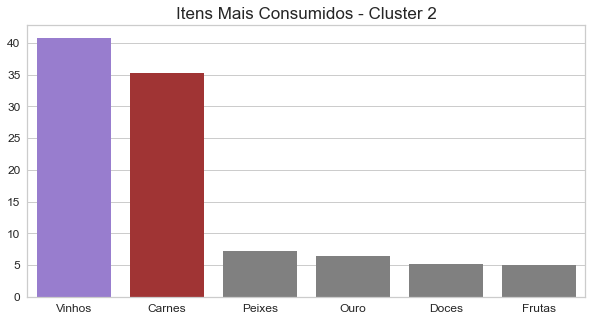

In [78]:
plt.figure(figsize=[10, 5])

col_cluster2 = df_pct_prod.iloc[:, 2].sort_values(ascending=False)

sns.barplot(x = ["Vinhos", "Carnes", "Peixes", "Ouro", "Doces", "Frutas"], y=col_cluster2.values, palette=["MediumPurple", \
                 "FireBrick", "grey", "grey", "grey", "grey"])
plt.title("Itens Mais Consumidos - Cluster 2", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Local de Compra X Clusters

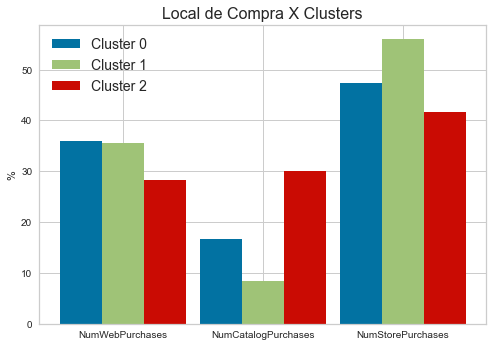

In [81]:
labels = list(df_pct_local.index)

c0 = df_pct_local[0].values
c1 = df_pct_local[1].values
c2 = df_pct_local[2].values

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()

rects1 = ax.bar(x - 0.3, c0, width, label = "Cluster 0")
rects2 = ax.bar(x , c1, width, label = "Cluster 1")
rects3 = ax.bar(x + 0.3, c2, width, label = "Cluster 2")

ax.set_ylabel("%")
ax.set_title("Local de Compra X Clusters", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels) 
ax.legend(fontsize=14)
plt.show()

1. Os 3 grupos criados compram mais ou menos igual pela internet.
2. Os clientes do cluster 2 compram bem mais pelo catálogo que os outros clientes.
3. Os clientes do cluster 1 costumam comprar mais na loja que os outros clientes, apesar de ser bem balanceado.

### Frequência e Gasto por Cluster

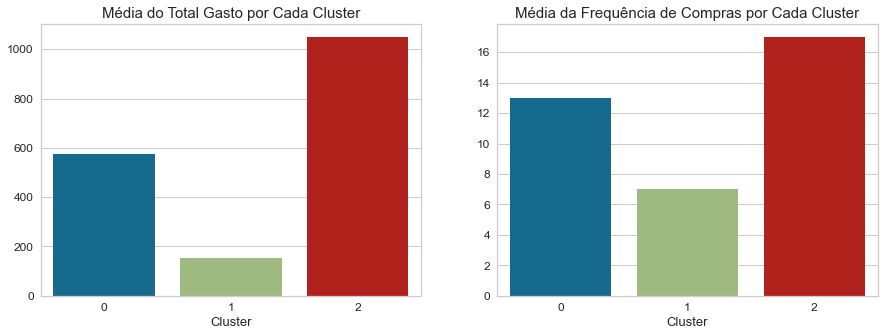

In [97]:
series_temp = df3.groupby("cluster").mean().T.round().iloc[10, :]
series_temp2 = df3.groupby("cluster").mean().T.round().iloc[11, :]

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
sns.barplot(series_temp.index, series_temp.values)
plt.title("Média do Total Gasto por Cada Cluster", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cluster", fontsize=13)

plt.subplot(1, 2, 2)
sns.barplot(series_temp2.index, series_temp2.values)
plt.title("Média da Frequência de Compras por Cada Cluster", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cluster", fontsize=13);

- Os clientes do cluster 2 são os mais frequentes, seguidos do cluster 0 e por fim do cluster 1.